In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('paper', font_scale=1.5)
red, blue, green, purple = sns.color_palette('Set1', 4)
fontdict = dict(size=14)

# Result 2

In [4]:
b = 1.3
v = 1
TA = 0.4
ΔT = np.linspace(TA-1+1e-10, TA-1e-10, 1000)
TB = TA - ΔT
assert ((0<=TB) & (TB<=1)).all()

# α = 0
α = 0.7
# α = 1/8

In [5]:
γ1 = (b*v*α*TA + (TA - TB)) / (v * (1 - TB))
γ2 = (b*v*α*TB + (1 + b) * (TA - TB)) / (v * (1 - TB) + (1 - v) * (TA - TB))

c = np.linspace(0, 1, 1001).reshape((-1, 1))
pstar = (c * (1 - TB) - b * α * TA - (TA - TB)) / (b * (1 - α) * (TA - TB))

pstar = np.ma.masked_greater(pstar, 1)
pstar = np.ma.masked_less(pstar, 0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

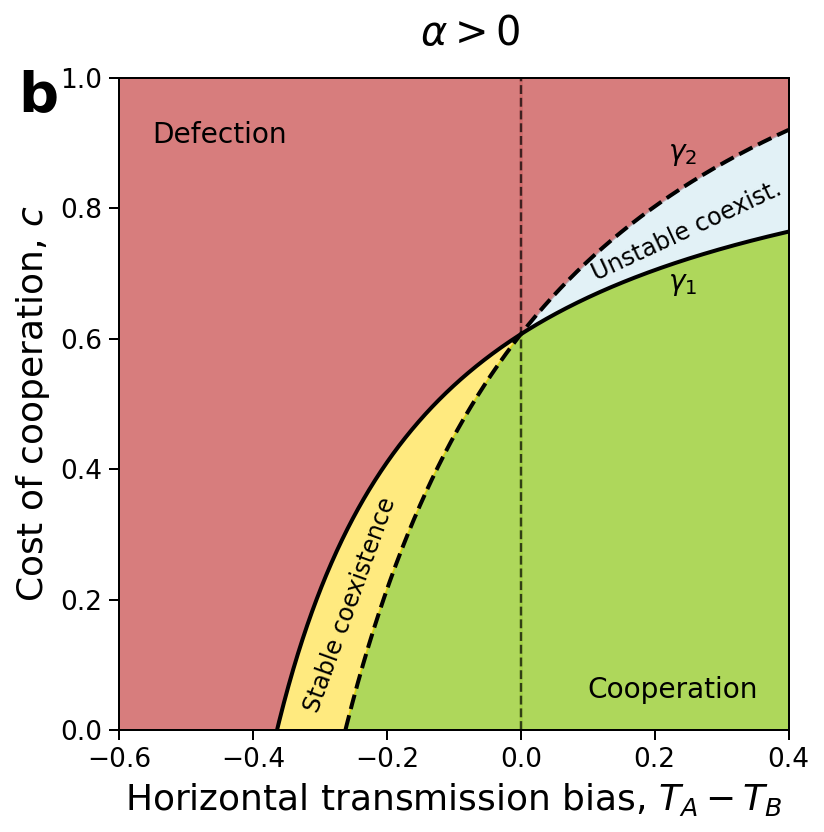

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# ax = axes[0]
ax.plot(ΔT, γ1, '-k', lw=2)
ax.plot(ΔT, γ2, '--k', lw=2)
ax.axvline(0, color='k', ls='--', alpha=0.7)

pos = ΔT>0
ax.fill_between(ΔT[pos],  0,        γ1[pos],  color='yellowgreen', alpha=0.8)
ax.fill_between(ΔT[~pos], 0,        γ2[~pos], color='yellowgreen', alpha=0.8)
ax.fill_between(ΔT[~pos], γ1[~pos], 1,        color='indianred',   alpha=0.8)
ax.fill_between(ΔT[pos],  γ2[pos],  1,        color='indianred',  alpha=0.8)
ax.fill_between(ΔT[~pos], γ2[~pos], γ1[~pos], color='gold',      alpha=0.5)
ax.fill_between(ΔT[pos], γ1[pos],   γ2[pos],  color='lightblue', alpha=0.35)

ax.set(xlim=(ΔT.min(), ΔT.max()), ylim=(0, 1), 
       xticks=np.linspace(ΔT.min(), ΔT.max(), 6),
)
ax.set_xlabel('Horizontal transmission bias, $T_A - T_B$', fontsize=18)
ax.set_ylabel('Cost of cooperation, $c$', fontsize=18)
ax.text(-0.55, 0.9, 'Defection', fontdict=fontdict, rotation=0)
ax.text(0.1, 0.05, r'Cooperation', fontdict=fontdict, rotation=0)
if α == 0.7:
    ax.text(-0.33, 0.03, 'Stable coexistence', fontdict=dict(fontsize=12), rotation=70)
    ax.text(0.1, 0.69, r'Unstable coexist.', fontdict=dict(fontsize=12), rotation=25)    
if α == 0:
    ax.text(0.1, 0.25, r'Unstable coexistence', fontdict=fontdict, rotation=55)

# ax = axes[1]
# im = ax.pcolormesh(ΔT, c, pstar, cmap='RdYlGn', alpha=0.5, rasterized=True, vmin=0, vmax=1)
# # plt.colorbar(im, label='Frequency of $A$ at equilibrium, $p^*$', ax=ax)
# ax.plot(ΔT, γ1, '-k', lw=2)
# ax.plot(ΔT, γ2, '--k', lw=2)
# ax.axvline(0, color='k', ls='--', alpha=0.7)
# ax.set(xlim=(ΔT.min(), ΔT.max()), ylim=(0, 1), 
#        xlabel='Horizontal transmission bias, $T_A - T_B$',
# )

# for ax in axes:
if α == 0:
    ax.text(0.22, 0.22, r'$\gamma_1$', fontdict=fontdict)
    ax.text(0.22, 0.72, r'$\gamma_2$', fontdict=fontdict)
if α == 0.7:
    ax.text(0.22, 0.675, r'$\gamma_1$', fontdict=fontdict)
    ax.text(0.22, 0.875, r'$\gamma_2$', fontdict=fontdict)

# fig.tight_layout()
if α == 0:
    ax.text(-0.15, 1.05, r'$\alpha=0$', fontdict=dict(fontsize=20))
    ax.text(-0.75, 0.95, 'a', fontdict=dict(fontsize=28, weight='bold'))
    fig.savefig('Figures/Result2_c_zero_alpha.pdf')
    fig.savefig('Figures/Result2_c_zero_alpha.eps')
if α == 0.7:
    ax.text(-0.15, 1.05, r'$\alpha>0$', fontdict=dict(fontsize=20))
    ax.text(-0.75, 0.95, 'b', fontdict=dict(fontsize=28, weight='bold'))
    fig.savefig('Figures/Result2_c_non_zero_alpha.pdf')
    fig.savefig('Figures/Result2_c_non_zero_alpha.eps')

## Corollary 5

In [6]:
c = 0.35

α = np.linspace(1e-10, 1-1e-10, 1001).reshape((-1, 1))
pstar = (c * (1 - TB) - b * α * TA - (TA - TB)) / (b * (1 - α) * (TA - TB))

pstar = np.ma.masked_greater(pstar, 1)
pstar = np.ma.masked_less(pstar, 0)

In [7]:
a1 = (c * (1 - TB) - (1 + b) * (TA - TB)) / (b * TB)
a2 = (c * (1 - TB) - (TA - TB))/(b * TA)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

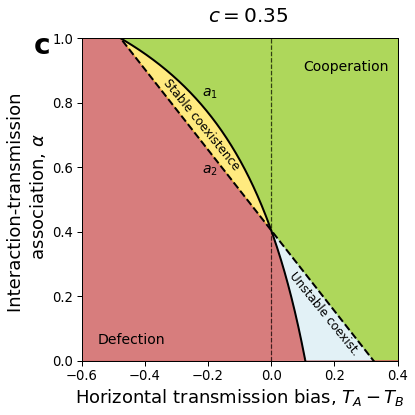

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(ΔT[a1<0] , a1[a1<0], '-k', lw=2)
ax.plot(ΔT[a1>0] , a1[a1>0], '-k', lw=2)
ax.plot(ΔT,  a2, '--k', lw=2)
ax.axvline(0, color='k', ls='--', alpha=0.7)

pos = ΔT>0
ax.fill_between(ΔT[pos],  1,       a2[pos],  color='yellowgreen', alpha=0.8)
ax.fill_between(ΔT[~pos], 1,       a1[~pos], color='yellowgreen', alpha=0.8)
ax.fill_between(ΔT[pos],  a1[pos],           color='indianred', alpha=0.8)
ax.fill_between(ΔT[~pos], a2[~pos],          color='indianred', alpha=0.8)
ax.fill_between(ΔT[~pos], a2[~pos],a1[~pos], color='gold', alpha=0.5)
ax.fill_between(ΔT[pos],  a1[pos], a2[pos],  color='lightblue', alpha=0.35)

ax.text(-0.55, 0.05, 'Defection', fontdict=fontdict, rotation=0)
ax.text(0.1, 0.9, r'Cooperation', fontdict=fontdict, rotation=0)
ax.text(-0.35, 0.59, 'Stable coexistence', fontdict=dict(fontsize=12), rotation=-51)
ax.text(0.05, 0.018, r'Unstable coexist.', fontdict=dict(fontsize=12), rotation=-51)

ax.set(xlim=(ΔT.min(), ΔT.max()), ylim=(0, 1),
       xticks=np.linspace(ΔT.min(), ΔT.max(), 6),
)
ax.set_xlabel('Horizontal transmission bias, $T_A - T_B$', fontsize=18)
ax.set_ylabel('Interaction-transmission \n association, ' + r'$\alpha$', fontsize=18)

ax.text(-0.22, 0.82, r'$a_1$', fontdict=fontdict)
ax.text(-0.22, 0.58, r'$a_2$', fontdict=fontdict)
ax.text(-0.75, 0.95, 'c', fontdict=dict(fontsize=28, weight='bold'))
ax.text(-0.2, 1.05, '$c={}$'.format(c), fontdict=dict(fontsize=20))
plt.tight_layout()


fig.savefig('Figures/Result2_alpha.pdf')
fig.savefig('Figures/Result2_alpha.eps', bbox_inches = 'tight')

# Recurrence - result 2

0.4924242424242424
0.4923076923076921


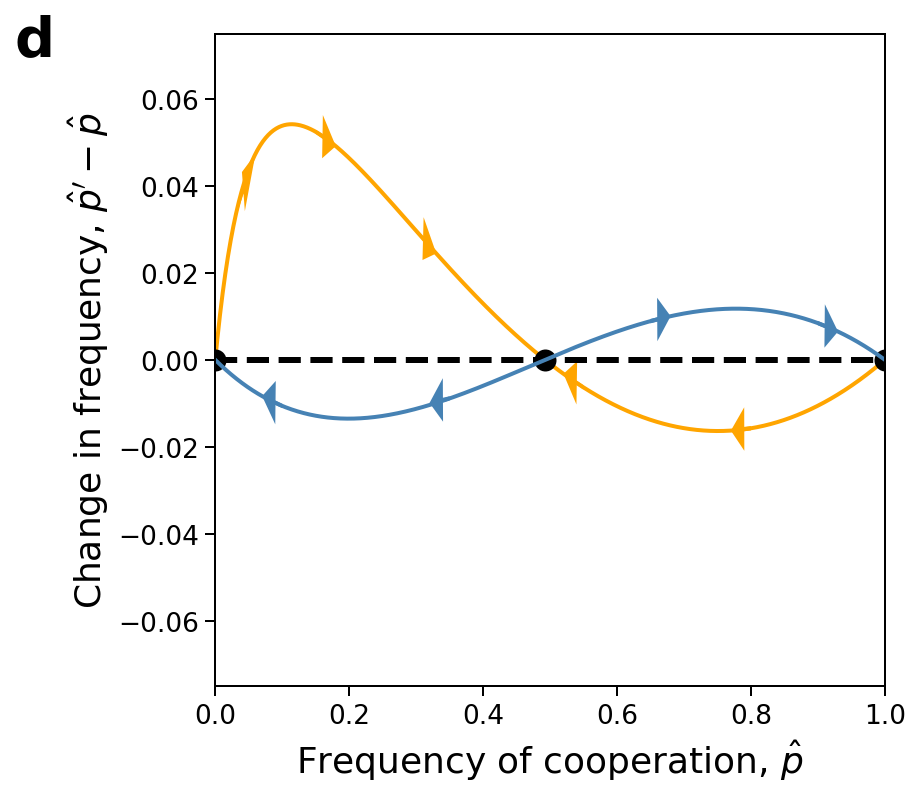

In [13]:
b=12
c = 0.35
T_A = 0.4
T_B = 0.9
α = 0.45

def p_parents_function(p):
    x1 = (p ** 2)*(1+b-c)*(1-(1-p)*(1-α)*T_B)
    x2 = p*(1-p)*(1-c)*(p*(1-α)*T_B+1-T_B)
    x3 = p*(1-p)*(1+b)*(p*(1-α)+α)*T_A
    x4 = ((1-p)**2)*p*(1-α)*T_A
    omega = 1+p*(b-c)
    p_parents = (x1+x2+x3+x4)/omega
    return p_parents

p_equilibrium = (c*(1-T_B)-α*b*T_A-(T_A-T_B))/(b*(1-α)*(T_A-T_B))
print(p_equilibrium)

p = np.arange(0, 1, 0.001)
p_tag = p_parents_function(p)

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(p, p_tag-p, color="orange", linewidth=2)
### Orange arrows
ax.plot(p, p-p, 'k--', linewidth=3)
ax.arrow(0.15, p_parents_function(0.15)-0.15, 0.03, p_parents_function(0.18)-0.18-(p_parents_function(0.15)-0.15), head_width=0.01, head_length=0.02, linewidth=0, color='orange', length_includes_head=True)
ax.arrow(0.03, p_parents_function(0.03)-0.03, 0.03, p_parents_function(0.06)-0.06-(p_parents_function(0.03)-0.03), head_width=0.01, head_length=0.02, linewidth=0, color='orange', length_includes_head=True)
ax.arrow(0.3, p_parents_function(0.3)-0.3, 0.03, p_parents_function(0.33)-0.33-(p_parents_function(0.3)-0.3), head_width=0.01, head_length=0.02, linewidth=0, color='orange', length_includes_head=True)
ax.arrow(0.55, p_parents_function(0.55)-0.55, -0.03, p_parents_function(0.52)-0.52-(p_parents_function(0.55)-0.55), head_width=0.01, head_length=0.02, linewidth=0, color='orange', length_includes_head=True)
ax.arrow(0.8, p_parents_function(0.8)-0.8, -0.03, p_parents_function(0.77)-0.77-(p_parents_function(0.8)-0.8), head_width=0.01, head_length=0.02, linewidth=0, color='orange', length_includes_head=True)



#plt.plot(β3/β1, β3/β1, "ko", label = r'$\tilde{p}^*$')
ax.set_xlabel(r'Frequency of cooperation, $\hat{p}$', fontsize = 18)
ax.set_ylabel(r"Change in frequency, $\hat{p}'-\hat{p}$", fontsize = 18)
ax.set_ylim(-0.075, 0.075)
ax.set_xlim(0, 1)


b=1.3
c = 0.904
T_A = 0.5
T_B = 0.1
α = 0.4
p_equilibrium = (c*(1-T_B)-α*b*T_A-(T_A-T_B))/(b*(1-α)*(T_A-T_B))
print(p_equilibrium)
for p_ in [0, 1, p_equilibrium]:
    plt.plot(p_, 0, "ko", markersize=10)
# ax.text(-0.75, 0.95, 'd', fontdict=dict(fontsize=28, weight='bold'))
ax.text(-0.3, 0.07, 'd', fontdict=dict(fontsize=28, weight='bold'))
#ax.text(0.4, 0.105, r'$v=1$', fontdict=dict(fontsize=28, weight='bold'))




p_tag = p_parents_function(p)
ax.plot(p, p_tag-p, linewidth = 2, color = 'steelblue')

## Blue arrows:
ax.arrow(0.35, p_parents_function(0.35)-0.35, -0.03, p_parents_function(0.33)-0.33-(p_parents_function(0.35)-0.35), head_width=0.01, head_length=0.02, linewidth=0, color='steelblue', length_includes_head=True)
ax.arrow(0.1, p_parents_function(0.1)-0.1, -0.03, p_parents_function(0.07)-0.07-(p_parents_function(0.1)-0.1), head_width=0.01, head_length=0.02, linewidth=0, color='steelblue', length_includes_head=True)

ax.arrow(0.65, p_parents_function(0.65)-0.65, 0.03, p_parents_function(0.68)-0.68-(p_parents_function(0.65)-0.65), head_width=0.01, head_length=0.02, linewidth=0, color='steelblue', length_includes_head=True)
ax.arrow(0.9, p_parents_function(0.9)-0.9, 0.03, p_parents_function(0.93)-0.93-(p_parents_function(0.9)-0.9), head_width=0.01, head_length=0.02, linewidth=0, color='steelblue', length_includes_head=True)


fig.savefig('Figures/coexistence_without_oblique.pdf')
fig.savefig('Figures/coexistence_without_oblique.eps', bbox_inches='tight')

# Result 3
## T_B > T_A

In [10]:
TA = 0.5
TB = 0.7
b = 2
α = 0.7

In [11]:
vhat = (TB - TA) / (1 - TA)

In [12]:
v = np.linspace(1e-10, 1-1e-10, 1000)

In [13]:
γ1 = (b * v * α * TA + (TA - TB)) / (v * (1 - TB))
γ1[np.isinf(γ1)] = -100
γ2 = (b * v * α * TB + (1 + b) * (TA - TB)) / (v * (1 - TB) + (1 - v) * (TA - TB))

In [14]:
c = np.linspace(0, 1, 1001).reshape((-1, 1))
β1 = (c * (1-v) - b * (1-α*v)) * (TA - TB)
β3 = α * b * v * TA - c * v * (1-TB) +(TA-TB)

pstar = β3 / β1
pstar = np.ma.masked_greater(pstar, 1)
pstar = np.ma.masked_less(pstar, 0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

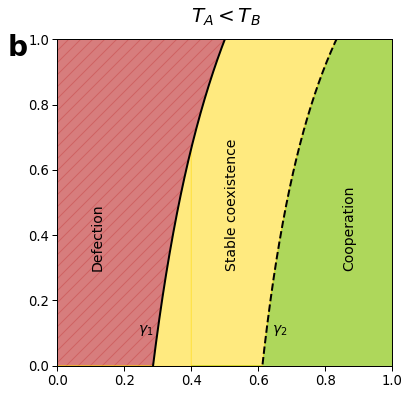

In [130]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(v, γ1, '-k', lw=2)
# γ2>1 when v<vhat for these parameter values
ix = v>vhat
ax.plot(v[ix], γ2[ix], '--k', lw=2)

# iii.b v<vhat, γ2<c : irrelevant for these parameters.
ix = v<=vhat
ax.fill_between(v[ix], γ2[ix], 1,      color='yellowgreen', alpha=0.8)
# # iii.a, v>vhat, c<γ2
ix = v>vhat
ax.fill_between(v[ix], 0,      γ2[ix], color='yellowgreen', alpha=0.8)
# vi, γ1<c 
ax.fill_between(v,     1 ,     γ1,     color='indianred', hatch="//", alpha=0.8) 

# vii.a, v<vhat, c<γ2 and c<γ1
ix = v<=vhat
ax.fill_between(v[ix], np.minimum(γ1[ix], γ2[ix]), color='gold', alpha=0.5)
# # vii.b, v>vhat, γ2<c<γ1
ix = v>vhat
ax.fill_between(v[ix], γ2[ix],  γ1[ix], color='gold', alpha=0.5)

ax.set(
    #ylabel='Cost of cooperation, $c$',
    #xlabel='Vertical transmission rate, $v$',
    ylim=(0, 1),
    xlim=(0, 1)
)

ax.text(0.85, 0.3, r'Cooperation', fontdict=fontdict, rotation=90)
ax.text(0.1, 0.3, r'Defection', fontdict=fontdict, rotation=90)
ax.text(0.5, 0.3, r'Stable coexistence', fontdict=fontdict, rotation=90)
ax.text(0.24, 0.1, r'$\gamma_1$', fontdict=fontdict)
ax.text(0.64, 0.1, r'$\gamma_2$', fontdict=fontdict)
ax.text(-0.15, 0.95, 'b', fontdict=dict(fontsize=28, weight='bold'))
ax.text(0.4, 1.05, r'$T_A<T_B$', fontdict=dict(fontsize=20))


fig.savefig('Figures/Result3_TB_TA.pdf')
fig.savefig('Figures/Result3_TB_TA.eps')

## TA > TB

In [131]:
TA = 0.5
TB = 0.4
b = 1.2
α = 0.4

In [132]:
vhat = (TB - TA) / (1 - TA)
v = np.linspace(1e-10, 1-1e-10, 1000)

In [133]:
γ1 = (b * v * α * TA + (TA - TB)) / (v * (1 - TB))
γ1[np.isinf(γ1)] = -100
γ2 = (b * v * α * TB + (1 + b) * (TA - TB)) / (v * (1 - TB) + (1 - v) * (TA - TB))

In [134]:
c = np.linspace(0, 1, 1001).reshape((-1, 1))
β1 = (c * (1-v) - b * (1-α*v)) * (TA - TB)
β3 = α * b * v * TA - c * v * (1-TB) +(TA-TB)

pstar = β3 / β1
pstar = np.ma.masked_greater(pstar, 1)
pstar = np.ma.masked_less(pstar, 0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


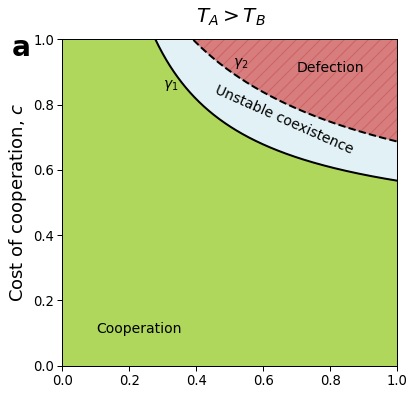

In [135]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(v, γ1, '-k', lw=2)
# γ2>1 when v<vhat for these parameter values
ax.plot(v[v>vhat], γ2[v>vhat], '--k', lw=2)

## ii. c<γ1
ax.fill_between(v, γ1, color='yellowgreen', alpha=0.8)

## v. c > γ2
ax.fill_between(v, 1, γ2, color='indianred', hatch="//", alpha=0.8)

## viii. γ1 < c < γ2
ax.fill_between(v, γ1, γ2, color='lightblue', alpha=0.35)

ax.set(
    #xlabel='Vertical transmission rate, $v$',
    ylim=(0, 1),
    xlim=(0, 1)
)
ax.set_ylabel(ylabel='Cost of cooperation, $c$', fontsize=18)

ax.text(0.1, 0.1, r'Cooperation', fontdict=fontdict)
ax.text(0.7, 0.9, r'Defection', fontdict=fontdict)
ax.text(0.45, 0.65, r'Unstable coexistence', fontdict=fontdict, rotation = -24)
ax.text(0.3, 0.85, r'$\gamma_1$', fontdict=fontdict)
ax.text(0.51, 0.92, r'$\gamma_2$', fontdict=fontdict)
ax.text(-0.15, 0.95, 'a', fontdict=dict(fontsize=28, weight='bold'))
ax.text(0.4, 1.05, r'$T_A>T_B$', fontdict=dict(fontsize=20))

fig.savefig('Figures/Result3_TA_TB.pdf')
fig.savefig('Figures/Result3_TA_TB.eps')

## Alpha vs v graph

$T_A > T_B$

In [15]:
TA = 0.5
TB = 0.4
b = 1.2
c = 0.5

In [16]:
v = np.linspace(1e-10, 1-1e-10, 1000)

In [17]:
a1 = (c*v*(1-TA)-(TA-TB)*(1+b-c))/(b*v*TB)
a2 = (c*v*(1-TB)-(TA-TB))/(b*v*TA)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


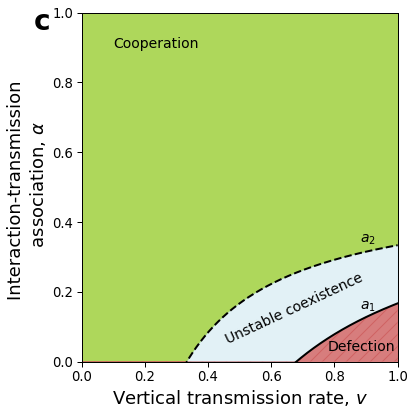

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(v, a1, '-k', lw=2)
ax.plot(v, a2, '--k', lw=2)
ax.set(ylim=(0, 1),
    xlim=(0, 1)
)
ax.set_xlabel('Vertical transmission rate, $v$', fontsize=18)
ax.set_ylabel('Interaction-transmission \n association, ' r'$\alpha$', fontsize=18)

##  α > a2
ax.fill_between(v, 1, a2, color='yellowgreen', alpha=0.8)

#  α < a1
ax.fill_between(v, a1, color='indianred', hatch="//", alpha=0.8) 

# a1 < α < a2
ax.fill_between(v, a1, a2, color='lightblue', alpha=0.35)

ax.text(0.1, 0.9, r'Cooperation', fontdict=fontdict)
ax.text(0.78, 0.03, r'Defection', fontdict=fontdict)
ax.text(0.45, 0.05, r'Unstable coexistence', fontdict=fontdict, rotation = 25)
ax.text(0.88, 0.15, r'$a_1$', fontdict=fontdict)
ax.text(0.88, 0.34, r'$a_2$', fontdict=fontdict)
ax.text(-0.15, 0.95, 'c', fontdict=dict(fontsize=28, weight='bold'))
plt.tight_layout()



fig.savefig('Figures/Result3_alpha_Vs_v_TA_TB.pdf')
fig.savefig('Figures/Result3_alpha_Vs_v_TA_TB.eps')

$T_B > T_A$

In [140]:
TA = 0.5
TB = 0.7
b = 2
c = 0.5

In [141]:
v = np.linspace(1e-10, 1-1e-10, 1000)

In [142]:
a1 = (c*v*(1-TA)-(TA-TB)*(1+b-c))/(b*v*TB)
a2 = (c*v*(1-TB)-(TA-TB))/(b*v*TA)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


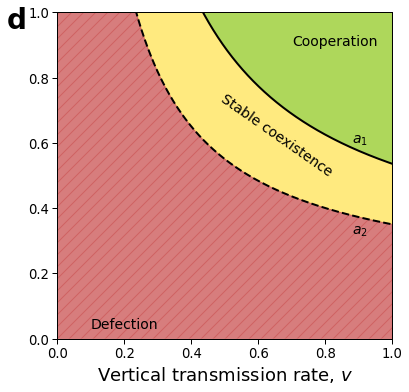

In [143]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(v, a1, '-k', lw=2)
ax.plot(v, a2, '--k', lw=2)
ax.set(#ylabel=r'Social association, $\alpha$',
    ylim=(0, 1),
    xlim=(0, 1)
)
ax.set_xlabel('Vertical transmission rate, $v$', fontsize=18)

##  α > a1 - fixation of cooperation
ax.fill_between(v, 1, a1, color='yellowgreen', alpha=0.8)

## a2 < α < a1 - stable coexisetence
ax.fill_between(v, a2, a1, color='gold', alpha=0.5)

## α < a2 - fixation of defection
ax.fill_between(v, a2, color='indianred', hatch="//", alpha=0.8) 


ax.text(0.7, 0.9, r'Cooperation', fontdict=fontdict)
ax.text(0.1, 0.03, r'Defection', fontdict=fontdict)
ax.text(0.48, 0.5, r'Stable coexistence', fontdict=fontdict, rotation = -35)
ax.text(0.88, 0.6, r'$a_1$', fontdict=fontdict)
ax.text(0.88, 0.32, r'$a_2$', fontdict=fontdict)
ax.text(-0.15, 0.95, 'd', fontdict=dict(fontsize=28, weight='bold'))


fig.savefig('Figures/Result3_alpha_Vs_v_TB_TA.pdf')
fig.savefig('Figures/Result3_alpha_Vs_v_TB_TA.eps')

# Reccurence - Result 3

In [84]:
p = np.arange(0, 1, 0.0001)

def p_adult_function(p):
    p_adults = (p**2)*(T_B-T_A)+p*(1+T_A-T_B)
    return p_adults

def p_parents_function(p):
    x1 = (p ** 2)*(1+b-c)*(1-(1-p)*(1-α)*T_B)
    x2 = p*(1-p)*(1-c)*(p*(1-α)*T_B+1-T_B)
    x3 = p*(1-p)*(1+b)*(p*(1-α)+α)*T_A
    x4 = ((1-p)**2)*p*(1-α)*T_A
    omega = 1+p*(b-c)
    p_parents = (x1+x2+x3+x4)/omega
    return p_parents

def p_next_gen(p_adults, p_parents):
    p_tag = v*p_parents + (1-v)*p_adults
    return p_tag

5.97
2.696
p*0.4515912897822446
0.45159128978224455
----
-0.09403999999999998
-0.042920000000000014
p*0.4564015312632924
0.4564015312632924


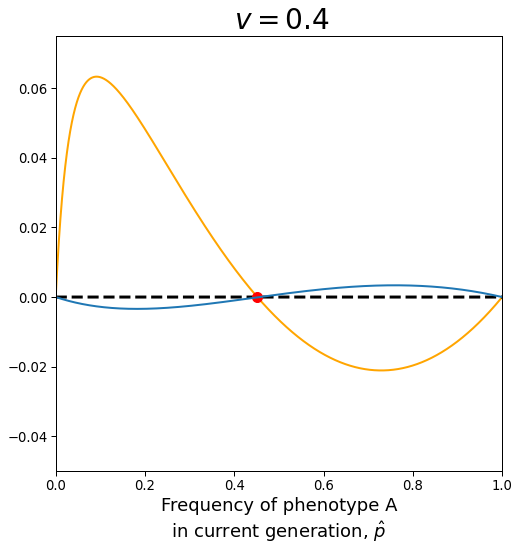

In [85]:
fig, ax = plt.subplots(figsize=(8, 8))

b=20
α = 1
T_A = 0.4
T_B = 0.9
v = 0.4
c = 0.1

β1 = (c*(1-v)-b*(1-α*v))*(T_A-T_B)
β3 = α*b*v*T_A - c*v*(1-T_B) + T_A-T_B

print(β1)
print(β3)
print("p*" + str(β3/β1))



p_parents = p_parents_function(p)
p_adults = p_adult_function(p)

p_tag = p_next_gen(p_adults, p_parents)

p1 =  p_next_gen(p_adult_function(β3/β1), p_parents_function(β3/β1))
print(p1)

ax.plot(p, p_tag-p, color = "orange", linewidth = 2)
ax.plot(p, p-p, 'k--', linewidth = 3)
ax.plot(β3/β1, 0, "ro", label = r'$\hat{p}^*$', markersize=10)
ax.set_xlabel(r'Frequency of phenotype A' + '\n' + r'in current generation, $\hat{p}$', fontdict=dict(fontsize=18))
#ax.set_ylabel(r"Frequency of phenotype A in next generation, $\hat{p}'$", fontdict=dict(fontsize=13))
ax.set_ylim(-0.05, 0.075)
ax.set_xlim(0, 1)


print("----")

b=1.2
α = 0.09
T_A = 0.5
T_B = 0.4
v = 0.6
c = 0.487

β1 = (c*(1-v)-b*(1-α*v))*(T_A-T_B)
β3 = α*b*v*T_A - c*v*(1-T_B) + T_A-T_B

print(β1)
print(β3)
print("p*" + str(β3/β1))

p_parents = p_parents_function(p)
p_adults = p_adult_function(p)

p_tag = p_next_gen(p_adults, p_parents)

p1 =  p_next_gen(p_adult_function(β3/β1), p_parents_function(β3/β1))
print(p1)
ax.plot(p, p_tag-p, linewidth = 2)
#ax.text(-0.1, 0.077, 'b', fontdict=dict(fontsize=28, weight='bold'))
ax.text(0.4, 0.077, r'$v=0.4$', fontdict=dict(fontsize=28, weight='bold'))



plt.savefig('Figures\coexistence_with_oblique.pdf')
plt.savefig('Figures\coexistence_with_oblique.eps', bbox_inches='tight')

# Time graphs

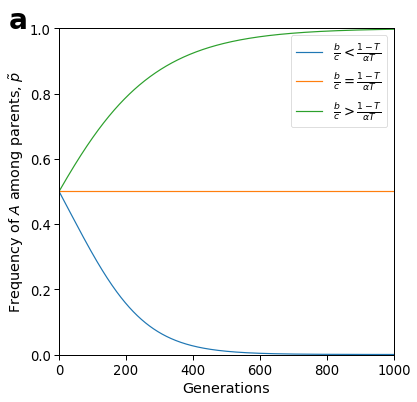

In [108]:
### T_A = T_B = T
### alpha <> 0

def evolution0(p0, b, c, T_A, T_B, alpha, tmax):
    p = [p0]

    for t in range(1, tmax):
        p_old = p[t-1] 
        x1 = (p_old ** 2)*(1+b-c)*(1-(1-p_old)*(1-alpha)*T_B)
        x2 = p_old*(1-p_old)*(1-c)*(p_old*(1-alpha)*T_B+1-T_B)
        x3 = p_old*(1-p_old)*(1+b)*(p_old*(1-alpha)+alpha)*T_A
        x4 = ((1-p_old)**2)*p_old*(1-alpha)*T_A
        omega = 1+p_old*(b-c)
        result = (x1+x2+x3+x4)/omega
        p.append(result)
        if result > 1:
            break

    return p

p0 = 0.5
c = 0.1
T_A =0.2
T_B = 0.2
alpha = 0.5
generations = 1000
fig, ax = plt.subplots(figsize=(6, 6))


b = 0.7
ax.plot(evolution0(p0, b, c, T_A, T_B, alpha, generations), label=r'$\frac{b}{c} < \frac{1-T}{\alpha T}$')
b = 0.8
ax.plot(evolution0(p0, b, c, T_A, T_B, alpha, generations), label=r'$\frac{b}{c} = \frac{1-T}{\alpha T}$')
b = 0.9
ax.plot(evolution0(p0, b, c, T_A, T_B, alpha, generations), label=r'$\frac{b}{c} > \frac{1-T}{\alpha T}$')
ax.legend()
ax.set_xlabel('Generations')
ax.set_ylabel(r'Frequency of $A$ among parents, $\tilde{p}$')
ax.set_ylim(0, 1)
ax.set_xlim(0, generations)
ax.text(-150, 1, 'a', fontdict=dict(fontsize=28, weight='bold'))
plt.savefig('Figures/Time_Figure_Equal_Horizontal.pdf')

0.35576923076923084


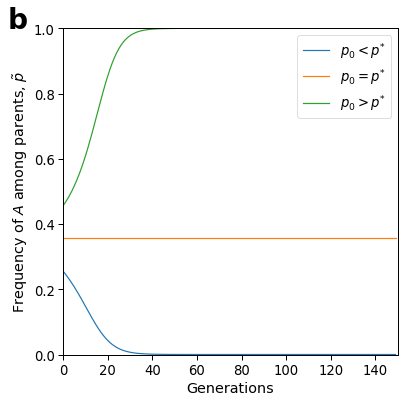

In [113]:
### Only vertical, alpha = 0

b = 1.3
c = 0.65
T_A = 0.5
T_B = 0.1
alpha = 0
generations = 150
fig, ax = plt.subplots(figsize=(6, 6))

p_star = c*(1-T_B)/(b*(T_A-T_B))-1/b
print(p_star)
ax.plot(evolution0(p_star-0.1, b, c, T_A, T_B, alpha, generations), label=r'$p_0 < p^{*}$')
ax.plot(evolution0(p_star, b, c, T_A, T_B, alpha, generations), label=r'$p_0 = p^{*}$')
ax.plot(evolution0(p_star+0.1, b, c, T_A, T_B, alpha, generations), label=r'$p_0 > p^{*}$')
ax.legend()
ax.set_xlabel('Generations')
ax.set_ylabel(r'Frequency of $A$ among parents, $\tilde{p}$')
ax.set_ylim(0, 1)
ax.set_xlim(0, generations)
ax.text(-25, 1, 'b', fontdict=dict(fontsize=28, weight='bold'))
plt.savefig('Figures/Time_Figure_Only_Vertical_No_Alpha.pdf')

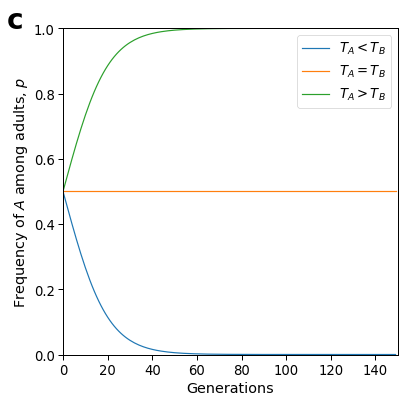

In [114]:
#### v = 0

def evolution2(p0, b, c, T_A, T_B, alpha, tmax):
    p = [p0]

    for t in range(1, tmax):
        p_old = p[t-1] 
        x1 = (p_old**2)*(alpha+(1-alpha)*(p_old+(1-p_old)*(1-T_B)))
        x2 = p_old*(1-p_old)*(alpha*(1-T_B)+(1-alpha)*(p_old+(1-p_old)*(1-T_B)))
        x3 = p_old*(1-p_old)*(alpha*T_A+(1-alpha)*p_old*T_A)
        x4 = ((1-p_old)**2)*p_old*(1-alpha)*T_A
        result = (x1+x2+x3+x4)
        p.append(result)
        if result > 1:
            break

    return p

p0 = 0.5
b = 1.3
c = 0.5
T_A = 0.5
alpha = 0.5
generations = 150
fig, ax = plt.subplots(figsize=(6, 6))


T_B = T_A + 0.1 # 0.6
ax.plot(evolution2(p0, b, c, T_A, T_B, alpha, generations), label=r'$T_A < T_B$')

T_B = T_A # 0.5
ax.plot(evolution2(p0, b, c, T_A, T_B, alpha, generations), label=r'$T_A = T_B$')

T_B = T_A - 0.1 # 0.4
ax.plot(evolution2(p0, b, c, T_A, T_B, alpha, generations), label=r'$T_A > T_B$')


ax.legend()
ax.set_xlabel('Generations')
ax.set_ylabel('Frequency of $A$ among adults, $p$')
ax.set_ylim(0, 1)
ax.set_xlim(0, generations)
ax.text(-25, 1, 'c', fontdict=dict(fontsize=28, weight='bold'))
plt.savefig('Figures/Time_Figure_No_Vertical.pdf')

# Invasion

In [2]:
def Get_P1_Next_Gen(p1, p2, p3, p4, b, c, TA, TB, α):
    w = 1 + (b-c)*(p1+p3)
    p1_tag = p1*(p1+p3)*(1+b-c)*(1-(1-α)*(p2+p4)*TB) 
    p1_tag += p1*(p2+p4)*(1-c)*(1-α*TB*(p1+p3)-TB*(p2+p4)) 
    p1_tag += p2*(p1+p3)*(1+b)*TA*(p1+p3+α*(p2+p4))  
    p1_tag += p2*(p2+p4)*(p1+p3)*(1-α)*TA

    return p1_tag/w

def Get_P3_Next_Gen(p1, p2, p3, p4, b, c, TA, TB, α): 
    w = 1 + (b-c)*(p1+p3)
    p3_tag = p3*(p1+p3)*(1+b-c)*(1-(1-α)*(p2+p4)*TB) 
    p3_tag += p3*(p2+p4)*(1-c)*(1-α*TB*(p1+p3)-TB*(p2+p4)) 
    p3_tag += p4*(p1+p3)*(1+b)*TA*(p1+p3+α*(p2+p4))  
    p3_tag += p4*(p2+p4)*(p1+p3)*(1-α)*TA

    return p3_tag/w

def Get_P2_Next_Gen(p1, p2, p3, p4, b, c, TA, TB, α): 
    w = 1 + (b-c)*(p1+p3)
    p2_tag = p2*(p2+p4)*(1-(1-α)*(p1+p3)*TA)
    p2_tag += p2*(p1+p3)*(1+b)*(1-α*TA*(p2+p4)-TA*(p1+p3))
    p2_tag += p1*(p2+p4)*(1-c)*(α*TB+(1-α)*(p2+p4)*TB)
    p2_tag += p1*(p1+p3)*(1+b-c)*(1-α)*(p2+p4)*TB

    return p2_tag/w

def Get_P4_Next_Gen(p1, p2, p3, p4, b, c, TA, TB, α): 
    w = 1 + (b-c)*(p1+p3)
    p4_tag = p4*(p2+p4)*(1-(1-α)*(p1+p3)*TA)
    p4_tag += p4*(p1+p3)*(1+b)*(1-α*TA*(p2+p4)-TA*(p1+p3))
    p4_tag += p3*(p2+p4)*(1-c)*(α*TB+(1-α)*(p2+p4)*TB)
    p4_tag += p3*(p1+p3)*(1+b-c)*(1-α)*(p2+p4)*TB

    return p4_tag/w



In [3]:
def simulate(p_0, p_equilibrium, ε, b, c, TA, TB, α1, α2, number_of_iterations = None):
    x = 2*p_0
    p1 = p_equilibrium - p_0
    p2 = 1 - p_equilibrium - p_0
    p3 = p_0
    p4 = p_0
    inv = [x]
    cop = [p1 + p3]
    times = 0
    while (x < 1-ε and x > ε):
        times = times + 1
        if (number_of_iterations is not None and times > number_of_iterations):
            break
        p1_tag = Get_P1_Next_Gen(p1 = p1  , p2 = p2, p3 = p3, p4 = p4, b = b, c = c, TA = TA, TB = TB, α = α1)
        p2_tag = Get_P2_Next_Gen(p1 = p1  , p2 = p2, p3 = p3, p4 = p4, b = b, c = c, TA = TA, TB = TB, α = α1)
        p3_tag = Get_P3_Next_Gen(p1 = p1  , p2 = p2, p3 = p3, p4 = p4, b = b, c = c, TA = TA, TB = TB, α = α2)
        p4_tag = Get_P4_Next_Gen(p1 = p1  , p2 = p2, p3 = p3, p4 = p4, b = b, c = c, TA = TA, TB = TB, α = α2)
        
        sum1 = p3_tag + p2_tag + p1_tag + p4_tag
        #print(sum1)

        p1_tag = p1_tag/sum1
        p2_tag = p2_tag/sum1
        p3_tag = p3_tag/sum1
        p4_tag = p4_tag/sum1

        x = p3_tag + p4_tag
        if abs(inv[len(inv)-1]-x)< ε/1000:
            break
        inv.append(x)
        cop.append(p1_tag + p3_tag)


        p1 = p1_tag
        p2 = p2_tag
        p3 = p3_tag
        p4 = p4_tag
    return inv[0]-inv[len(inv)-1]<0, cop, inv


p* = 0.4188034188034192
[1.52350427 1.52343288 1.5233649  ... 1.21063492 1.21063491 1.21063491]


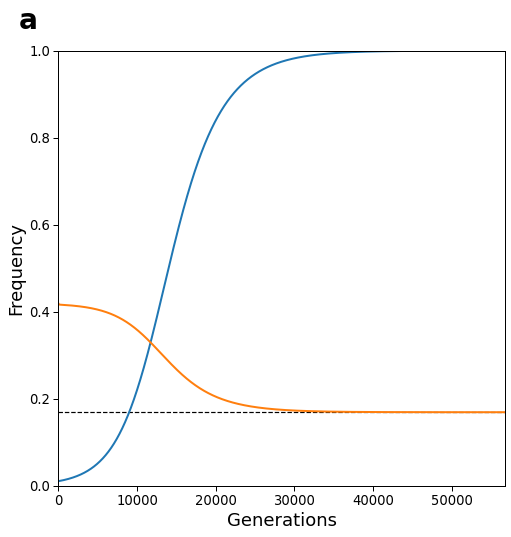

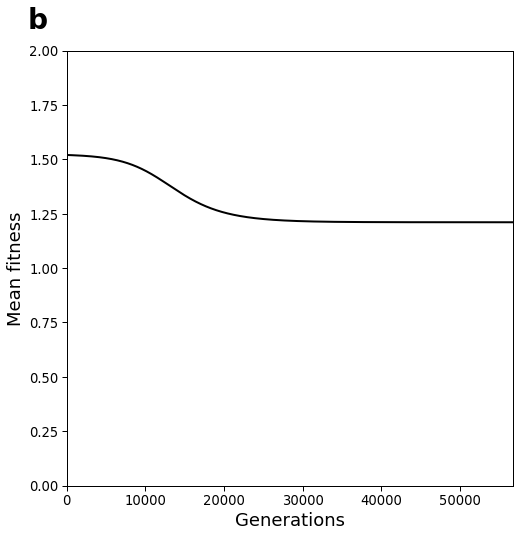

In [14]:
c = 0.05
TA = 0.4
TB = 0.7
b = 1.3
α1 = 0.7
p_equilibrium = (c*(1-TB) - b*α1*TA-(TA-TB))/(b*(1-α1)*(TA-TB))
print('p* = ' + str(p_equilibrium))

p_0 = 0.005
α2 = 0.65
successful, cop, inv = simulate(p_0, p_equilibrium, ε = 0.00001, b = b, c = c, TA= TA, TB=TB, α1=α1, α2 = α2, number_of_iterations = 1000000)
p_equilibrium2 = (c*(1-TB) - b*α2*TA-(TA-TB))/(b*(1-α2)*(TA-TB))
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(inv, linewidth=2)
ax.plot(cop, linewidth=2)
ax.hlines(p_equilibrium2, xmin = 0, xmax = len(cop), color='black', linestyle='dashed')
ax.set_ylim(0, 1)
ax.set_xlim(0, len(inv))
ax.set_xlabel('Generations', fontsize = 18)
ax.set_ylabel(r'Frequency', fontsize = 18)
ax.text(-5000, 1.05, 'a', fontdict=dict(fontsize=28, weight='bold'))
fig.savefig('Figures/Frequency_of_invadors.eps', bbox_inches='tight')


#p_equilibrium2 = (c*(1-TB) - b*α2*TA-(TA-TB))/(b*(1-α2)*(TA-TB))
fig2, ax2 = plt.subplots(figsize=(8, 8))
mean_fitness = 1 + (b-c)*np.array(cop)
print(mean_fitness)
ax2.plot(mean_fitness, color='black', linewidth=2)
ax2.set_ylim(0, 2)
ax2.set_xlim(0, len(cop))
ax2.set_xlabel('Generations', fontsize = 18)
ax2.set_ylabel('Mean fitness', fontsize = 18)
#ax2.hlines(p_equilibrium2, xmin = 0, xmax = len(cop), color='black', linestyle='dashed')
ax2.text(-5000, 2.1, 'b', fontdict=dict(fontsize=28, weight='bold'))
fig2.savefig('Figures/mean_fitness_of_invadors.eps', bbox_inches='tight')



In [107]:
# Validate for different value of c
for c in [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.21]:
    TA = 0.4
    TB = 0.7
    b = 1.3
    α1 = 0.7
    p_equilibrium = (c*(1-TB) - b*α1*TA-(TA-TB))/(b*(1-α1)*(TA-TB))
    print('p* = ' + str(p_equilibrium))

    p_0 = p_equilibrium/100
    print(c)
    lst = np.linspace(0,1,10)
    for α2 in lst:
        successful, cop, inv = simulate(p_0, p_equilibrium, ε = 0.0001, b = b, c = c, TA= TA, TB=TB, α1=α1, α2 = α2, number_of_iterations = 10000)
        if (α1>α2 and not successful):
            print("error")
        if (α1<α2 and successful):
            print("error")

p* = 0.5444444444444447
0.001
p* = 0.5213675213675218
0.01
p* = 0.4188034188034192
0.05
p* = 0.2905982905982909
0.1
p* = 0.162393162393163
0.15
p* = 0.0341880341880347
0.2
p* = 0.00854700854700903
0.21


In [123]:
# Validate for different value of alpha
c = 0.05

TA = 0.4
TB = 0.7
b = 1.3
a1 = (c*(1-TA)-(TA-TB)*(1+b-c))/(b*TB)
a2 = (c*(1-TB)-(TA-TB))/(b*TA)
alpha_values = np.linspace(a2, a1,10)
for α1 in alpha_values:
    lst = np.linspace(0,1,10)
    for α2 in lst:
        if (α1 == α2):
            continue
        p_equilibrium = (c*(1-TB) - b*α1*TA-(TA-TB))/(b*(1-α1)*(TA-TB))
        print('p* = ' + str(p_equilibrium))
        p_0 = p_equilibrium/100
        print('α1= ' + str(α1) + ' α2= ' + str(α2))
        successful, cop, inv = simulate(p_0, p_equilibrium, ε = 0.0001, b = b, c = c, TA= TA, TB=TB, α1=α1, α2 = α2, number_of_iterations = 10000)
    if (α1>α2 and not successful):
        print("error")
    if (α1<α2 and successful):
        print("error")





p* = -0.0
α1= 0.6057692307692306 α2= 0.0
p* = -0.0
α1= 0.6057692307692306 α2= 0.1111111111111111
p* = -0.0
α1= 0.6057692307692306 α2= 0.2222222222222222
p* = -0.0
α1= 0.6057692307692306 α2= 0.3333333333333333
p* = -0.0
α1= 0.6057692307692306 α2= 0.4444444444444444
p* = -0.0
α1= 0.6057692307692306 α2= 0.5555555555555556
p* = -0.0
α1= 0.6057692307692306 α2= 0.6666666666666666
p* = -0.0
α1= 0.6057692307692306 α2= 0.7777777777777777
p* = -0.0
α1= 0.6057692307692306 α2= 0.8888888888888888
p* = -0.0
α1= 0.6057692307692306 α2= 1.0
p* = 0.06666666666666696
α1= 0.6245421245421244 α2= 0.0
p* = 0.06666666666666696
α1= 0.6245421245421244 α2= 0.1111111111111111
p* = 0.06666666666666696
α1= 0.6245421245421244 α2= 0.2222222222222222
p* = 0.06666666666666696
α1= 0.6245421245421244 α2= 0.3333333333333333
p* = 0.06666666666666696
α1= 0.6245421245421244 α2= 0.4444444444444444
p* = 0.06666666666666696
α1= 0.6245421245421244 α2= 0.5555555555555556
p* = 0.06666666666666696
α1= 0.6245421245421244 α2= 0.66666

In [25]:
### Validate when α2<α1 R'(1) > 0

b_options = [1.1, 1.3, 1.5, 2, 4, 8, 16]
slopes = []
for b in b_options:
    for TB in np.arange(0, 1, 0.05):
        print('TB = ' + str(TB))
        # TA < TB
        for TA in np.arange(0, TB, 0.05):
            if (TB == TA):
                continue
            # 0 < c < 1
            for c in np.arange(0, 1, 0.05):
                a1 = (c*(1-TA)-(TA-TB)*(1+b-c))/(b*TB)
                a2 = (c*(1-TB)-(TA-TB))/(b*TA)
                # coexistence
                if a2>=a1 or abs(a2-1)<0.01:
                    continue
                step = (a1-a2)/100
                for α1 in np.arange(a2, a1, step):
                    for α2 in np.arange(0, α1, α1/50):
                        p = (c*(1-TB)-b*α1*TA-(TA-TB))/(b*(1-α1)*(TA-TB))
                        x = (1+b*p-c)*(1-TB*(1-p))+b*p*α2*TB*(1-p)
                        q = (1+b*p)*(1-TA*(p))-b*p*α2*TA*(1-p)
                        w = 1 + (b-c)*p
                        if (abs(1-p)< 0.01 or abs(p)<0.01):
                            continue

                        slope = 2 - (x+q)/w
                        slopes.append(slope)
                        if slope<0:
                            print("Error")
                            print(f"{a1}, {a2}")
                            print(f'TA = {TA}, TB = {TB}, c = {c}, α1 = {α1}, α2 = {α2}, b = {b}, slope = {slope}') 


TB = 0.0
TB = 0.05
TB = 0.1
TB = 0.15000000000000002
TB = 0.2
TB = 0.25
TB = 0.30000000000000004
TB = 0.35000000000000003
TB = 0.4
TB = 0.45
TB = 0.5
TB = 0.55
TB = 0.6000000000000001
TB = 0.65
TB = 0.7000000000000001
TB = 0.75
TB = 0.8
TB = 0.8500000000000001
TB = 0.9
TB = 0.9500000000000001
TB = 0.0
TB = 0.05
TB = 0.1
TB = 0.15000000000000002
TB = 0.2
TB = 0.25
TB = 0.30000000000000004
TB = 0.35000000000000003
TB = 0.4
TB = 0.45
TB = 0.5
TB = 0.55
TB = 0.6000000000000001
TB = 0.65
TB = 0.7000000000000001
TB = 0.75
TB = 0.8
TB = 0.8500000000000001
TB = 0.9
TB = 0.9500000000000001
TB = 0.0
TB = 0.05
TB = 0.1
TB = 0.15000000000000002
TB = 0.2
TB = 0.25
TB = 0.30000000000000004
TB = 0.35000000000000003
TB = 0.4
TB = 0.45
TB = 0.5
TB = 0.55
TB = 0.6000000000000001
TB = 0.65
TB = 0.7000000000000001
TB = 0.75
TB = 0.8
TB = 0.8500000000000001
TB = 0.9
TB = 0.9500000000000001
TB = 0.0
TB = 0.05
TB = 0.1
TB = 0.15000000000000002
TB = 0.2
TB = 0.25
TB = 0.30000000000000004
TB = 0.35000000000000

In [34]:
# validate all slopes are positive
np.all(np.array(slopes)>0)

True

In [36]:

### Validate when α1<α2 R'(1) < 0

b_options = [1.1, 1.3, 1.5, 2, 4, 8, 16]
slopes = []
for b in b_options:
    for TB in np.arange(0, 1, 0.05):
        print('TB = ' + str(TB))
        # TA < TB
        for TA in np.arange(0, TB, 0.05):
            if (TB == TA):
                continue
            # 0 < c < 1
            for c in np.arange(0, 1, 0.05):
                a1 = (c*(1-TA)-(TA-TB)*(1+b-c))/(b*TB)
                a2 = (c*(1-TB)-(TA-TB))/(b*TA)
                # coexistence
                if a2>=a1 or abs(a2-1)<0.01:
                    continue
                step = (a1-a2)/100
                for α1 in np.arange(a2, a1, step):
                    for α2 in np.arange(α1, 1, (1-α1)/50):
                        p = (c*(1-TB)-b*α1*TA-(TA-TB))/(b*(1-α1)*(TA-TB))
                        x = (1+b*p-c)*(1-TB*(1-p))+b*p*α2*TB*(1-p)
                        q = (1+b*p)*(1-TA*(p))-b*p*α2*TA*(1-p)
                        w = 1 + (b-c)*p
                        if (abs(1-p)< 0.01 or abs(p)<0.01):
                            continue

                        slope = 2 - (x+q)/w
                        slopes.append(slope)
                        if slope<0:
                            print("Error")
                            print(f"{a1}, {a2}")
                            print(f'TA = {TA}, TB = {TB}, c = {c}, α1 = {α1}, α2 = {α2}, b = {b}, slope = {slope}') 


TB = 0.0
TB = 0.05
TB = 0.1
TB = 0.15000000000000002
TB = 0.2
TB = 0.25
TB = 0.30000000000000004
TB = 0.35000000000000003
TB = 0.4
TB = 0.45
TB = 0.5
TB = 0.55
TB = 0.6000000000000001
TB = 0.65
TB = 0.7000000000000001
TB = 0.75
TB = 0.8
TB = 0.8500000000000001
TB = 0.9
TB = 0.9500000000000001
TB = 0.0
TB = 0.05
TB = 0.1
TB = 0.15000000000000002
TB = 0.2
TB = 0.25
TB = 0.30000000000000004
TB = 0.35000000000000003
TB = 0.4
TB = 0.45
TB = 0.5
TB = 0.55
TB = 0.6000000000000001
TB = 0.65
TB = 0.7000000000000001
TB = 0.75
TB = 0.8
TB = 0.8500000000000001
TB = 0.9
TB = 0.9500000000000001
TB = 0.0
TB = 0.05
TB = 0.1
TB = 0.15000000000000002
TB = 0.2
TB = 0.25
TB = 0.30000000000000004
TB = 0.35000000000000003
TB = 0.4
TB = 0.45
TB = 0.5
TB = 0.55
TB = 0.6000000000000001
TB = 0.65
TB = 0.7000000000000001
TB = 0.75
TB = 0.8
TB = 0.8500000000000001
TB = 0.9
TB = 0.9500000000000001
TB = 0.0
TB = 0.05
TB = 0.1
TB = 0.15000000000000002
TB = 0.2
TB = 0.25
TB = 0.30000000000000004
TB = 0.35000000000000